In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# we want to keept it simple and analyse 2 dimensions only
# I want every rows but only 2 last columns
cdf = df.iloc[:, [3, 4]]
print(cdf.shape)
cdf.head()

(200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
cdf = cdf.values
print(cdf.shape)
cdf[:5]

(200, 2)


array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

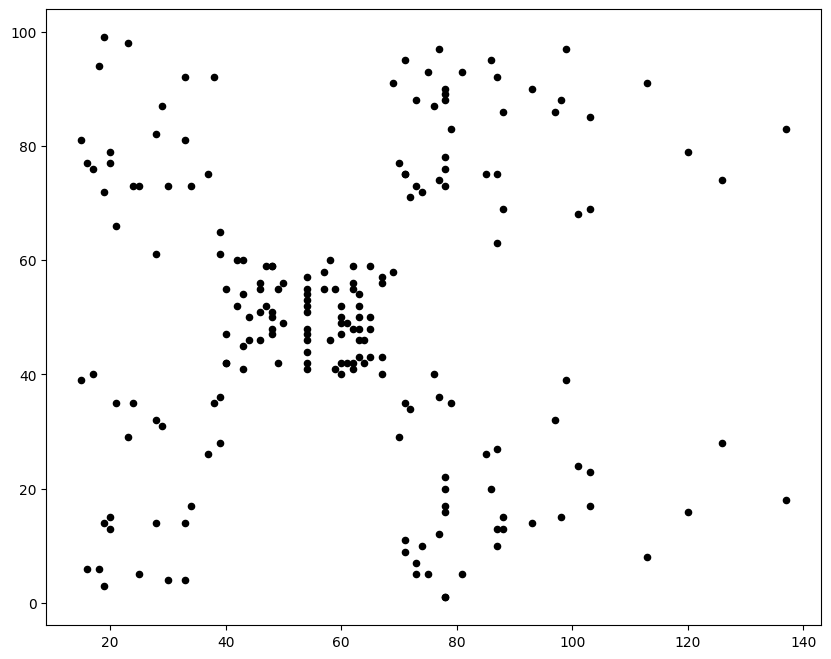

In [5]:
# when looking at the plot, it seems 5 clusters would be appropriate
plt.figure(figsize=(10, 8))
plt.scatter(cdf[:, 0], cdf[:, 1], s=20, c='k');

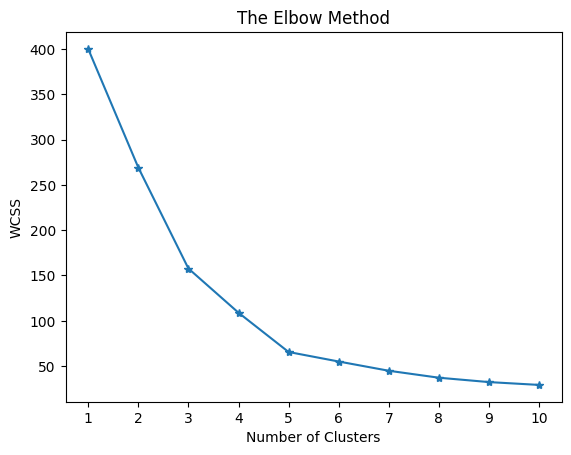

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# checking how many clusters would be appropriate by  wcss technique
wcss = []
for i in range(1, 11):


    pipe = Pipeline([
        ('scaler', StandardScaler()),

        # max_iter says how many times k points would be chooses and clustering will be done(300 times)
        # algorithm will be run with different initial centroids(best result would be returned)
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ]) 
     
    pipe.fit(cdf)

    # inertia == wcss
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

[0 3 0 3 0 3 0 3 0]
[0 1 2 3 4]


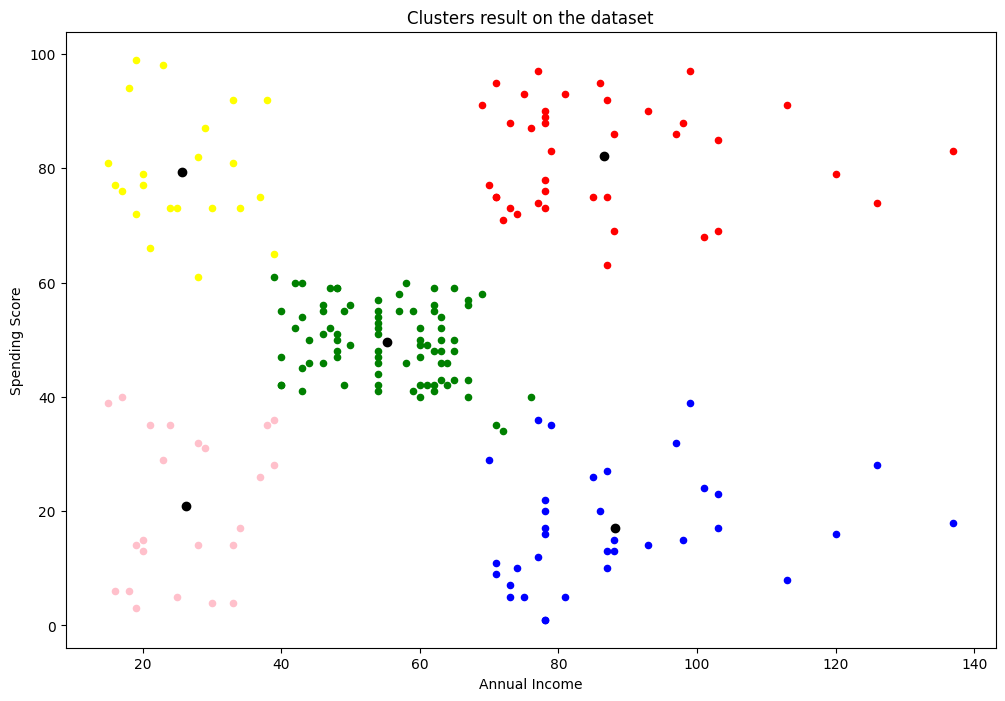

In [7]:
# from wcss technique it is obvious that 5 would give the best result

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

# fit_predict will divide our data into groups and will give each of them a cluster index
labels = kmeans.fit_predict(cdf)

print(labels[:9])
print(np.unique(labels)) # tells us the uniqe values
# as expected we have only 5 clusters(0-4)

plt.figure(figsize=(12,8))
plt.scatter(cdf[labels==0, 0], cdf[labels==0, 1], s=20, color='pink')
plt.scatter(cdf[labels==1, 0], cdf[labels==1, 1], s=20, color='b')
plt.scatter(cdf[labels==2, 0], cdf[labels==2, 1], s=20, color='r')
plt.scatter(cdf[labels==3, 0], cdf[labels==3, 1], s=20, color='yellow')
plt.scatter(cdf[labels==4, 0], cdf[labels==4, 1], s=20, color='g')
# plt.scatter(cdf[:, 0], cdf[:, 1], s=30, c=labels.astype(float))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='k')
plt.title('Clusters result on the dataset')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [8]:
cdf[labels==0].shape

(23, 2)

[3 4 3 4 3]


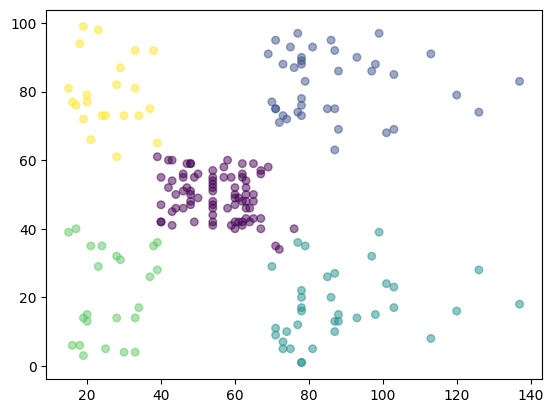

In [9]:
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

k_means.fit(cdf)
labels = k_means.labels_
print(labels[:5])

# area = np.pi * ( cdf[:, 1])**2  
plt.scatter(cdf[:, 0], cdf[:, 1], s=30, c=labels.astype(float), alpha=0.5)


# plt.scatter(cdf[labels==0, 0], cdf[labels==0, 1], s=20, color='k')
# plt.scatter(cdf[labels==1, 0], cdf[labels==1, 1], s=20, color='b')
# plt.scatter(cdf[labels==2, 0], cdf[labels==2, 1], s=20, color='r')
# plt.scatter(cdf[labels==3, 0], cdf[labels==3, 1], s=20, color='purple')
# plt.scatter(cdf[labels==4, 0], cdf[labels==4, 1], s=20, color='g')


plt.show()
